In [1]:
sc

In [1]:
csv = '/Users/ltsai/Documents/workspace/github/pydatasg-17Nov2015/' \
      'Most_Popular_Baby_Names_by_Sex_and_Mother_s_Ethnic_Group__New_York_City.csv'
df = sqlContext.read.format('com.databricks.spark.csv'). \
options(header='true', inferschema='true').load(csv) 

In [3]:
df.printSchema()

root
 |-- BRTH_YR: string (nullable = true)
 |-- GNDR: string (nullable = true)
 |-- ETHCTY: string (nullable = true)
 |-- NM: string (nullable = true)
 |-- CNT: string (nullable = true)
 |-- RNK: string (nullable = true)



In [4]:
df.show(10)

+-------+------+--------------------+-------+---+---+
|BRTH_YR|  GNDR|              ETHCTY|     NM|CNT|RNK|
+-------+------+--------------------+-------+---+---+
|   2011|FEMALE|ASIAN AND PACIFIC...|ABIGAIL| 24| 24|
|   2011|FEMALE|ASIAN AND PACIFIC...|ABIGAIL| 24| 24|
|   2011|FEMALE|ASIAN AND PACIFIC...|ABIGAIL| 24| 24|
|   2011|FEMALE|ASIAN AND PACIFIC...|    ADA| 13| 35|
|   2011|FEMALE|ASIAN AND PACIFIC...|    ADA| 13| 35|
|   2011|FEMALE|ASIAN AND PACIFIC...|    ADA| 13| 35|
|   2011|FEMALE|ASIAN AND PACIFIC...|  AISHA| 13| 35|
|   2011|FEMALE|ASIAN AND PACIFIC...|  AISHA| 13| 35|
|   2011|FEMALE|ASIAN AND PACIFIC...|  AISHA| 13| 35|
|   2011|FEMALE|ASIAN AND PACIFIC...|   AIZA| 10| 38|
+-------+------+--------------------+-------+---+---+
only showing top 10 rows



In [5]:
from pyspark.sql.types import *
customSchema = StructType([StructField('BRTH_YR', StringType(), True),
                           StructField('GNDR', StringType(), True),
                           StructField('ETHCTY', StringType(), True),
                           StructField('NM', StringType(), True),
                           StructField('CNT', IntegerType(), True),
                           StructField('RNK', IntegerType(), True)])

df = sqlContext.read.format('com.databricks.spark.csv'). \
        options(header='true'). \
        load(csv, schema = customSchema).cache() 

In [6]:
df.printSchema()

root
 |-- BRTH_YR: string (nullable = true)
 |-- GNDR: string (nullable = true)
 |-- ETHCTY: string (nullable = true)
 |-- NM: string (nullable = true)
 |-- CNT: integer (nullable = true)
 |-- RNK: integer (nullable = true)



In [7]:
df.select('ETHCTY').distinct().collect()

[Row(ETHCTY=u'HISPANIC'),
 Row(ETHCTY=u'ASIAN AND PACIFIC ISLANDER'),
 Row(ETHCTY=u'BLACK NON HISPANIC'),
 Row(ETHCTY=u'WHITE NON HISPANIC')]

In [8]:
df.filter("ETHCTY = 'ASIAN AND PACIFIC ISLANDER'"). \
    select(df.RNK, df.CNT, df.NM, df.GNDR). \
    orderBy(df.RNK.asc()).show(10)

+---+---+------+------+
|RNK|CNT|    NM|  GNDR|
+---+---+------+------+
|  1|177| ETHAN|  MALE|
|  1|119|SOPHIA|FEMALE|
|  1|119|SOPHIA|FEMALE|
|  1|177| ETHAN|  MALE|
|  1|119|SOPHIA|FEMALE|
|  1|177| ETHAN|  MALE|
|  2|173|JAYDEN|  MALE|
|  2|106| CHLOE|FEMALE|
|  2|106| CHLOE|FEMALE|
|  2|173|JAYDEN|  MALE|
+---+---+------+------+
only showing top 10 rows



In [9]:
df1 = df.filter("ETHCTY = 'ASIAN AND PACIFIC ISLANDER' AND GNDR='FEMALE'"). \
         select(df.RNK, df.CNT, df.NM). \
         distinct().orderBy(df.RNK.asc())
df1.show(10)

+---+---+--------+
|RNK|CNT|      NM|
+---+---+--------+
|  1|119|  SOPHIA|
|  2|106|   CHLOE|
|  3| 93|   EMILY|
|  4| 89|  OLIVIA|
|  5| 75|    EMMA|
|  6| 67|ISABELLA|
|  7| 54| TIFFANY|
|  8| 52|  ASHLEY|
|  9| 48|   FIONA|
| 10| 47|  ANGELA|
+---+---+--------+
only showing top 10 rows



In [10]:
p = df1.toPandas()
p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 3 columns):
RNK    156 non-null int64
CNT    156 non-null int64
NM     156 non-null object
dtypes: int64(2), object(1)
memory usage: 4.9+ KB


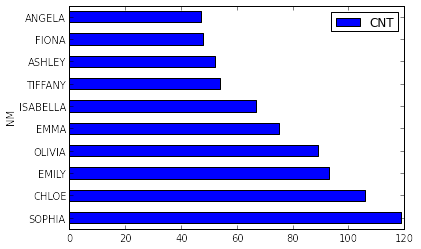

In [11]:
%matplotlib inline
p[:10].plot(kind='barh', x='NM', y="CNT")